# Wprowadzenie do sztucznej inteligencji - projekt

**Czym jest i jakie są przyczyny zawału serca**

Zawał serca jest konsekwencją choroby niedokrwiennej serca. Występuje, gdy przypływ krwi w tętnicach wieńcowych jest zbyt mały. Najczęstsze przyczyny zawału to: miażdżyca, wysoki cholesterol, nadciśnienie tętnicze, otyłość, cukrzyca, brak aktywności fizycznej, niewłaściwa dieta.

![](https://drive.google.com/uc?export=view&id=1VGgNyLJ59TMXJvkoEGuK5Z63P6EOZEJi)

**Objawy zawału serca**

![](https://drive.google.com/uc?export=view&id=1CQNQ-utMzFGAg5I8ZyHX4rzAjLklIzdi)

# **Wybrany zbór danych**

https://archive.ics.uci.edu/ml/datasets/Heart+Disease?fbclid=IwAR2JMrbGy6oMNuDuV3LQLG517EWlLiy_WfDlXhMyXMabS19qRhRRs9_b8XQ

Heart Disease Data Set

V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


## **Wykorzystywane dane**


*   age - Wiek pacjenta

*   sex - Płeć pacjenta (0 - kobieta, 1 - mężczyzna)

*   cp - Rodzaj bólu klatki piersiowej (1 - typowa angina, 2 - nietypowa angina, 3 - nieanginowy ból, 4 - bez symptomów)

*   trestbps - Ciśnienie krwi podczas odpoczynku (mm Hg)

*   chol - Poziom cholesterolu (mg/dl)

*   fbs - Cukier we krwi po nocy niejedzenia (powyżej 120mg/dl zakładamy cukrzycę) (0- False, 1 - True)

*   restecg - Wyniki elektrokardiografii podczas odpoczynku (0 - normalne, 1 - zmiany odcinka ST, 2 - przerost lewej komory)

*   thalach - Maksymalny puls

*   exang - Angina spowodowana treningiem (1 - tak, 0 - nie)

*   oldpeak - Obniżenie odcinka ST wywołanego treningiem w porównaniu z odpoczynkiem 

*   slope - Nachylenie odcinka ST podczas wysiłku (1 - narastające, 2 - stałe, 3 - malejące)

*   ca - Wyniki angiografii

*   thal - Talasemia (3 - normalna, 6 - uleczona choroba, 7 - odwracalna choroba)
























#Analiza i przygotowanie danych dotyczących chorób serca do wykorzystania w algorytmach uczenia maszynowego.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
csv_labels = ["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall", "output"]
df = pd.read_csv("processed.cleveland.data", names=csv_labels)

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
print(df.shape, "\n")
print(df.info(), "\n")
print(df.iloc[302])

(303, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trtbps    303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalachh  303 non-null    float64
 8   exng      303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    float64
 11  caa       303 non-null    object 
 12  thall     303 non-null    object 
 13  output    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None 

age          38.0
sex           1.0
cp            3.0
trtbps      138.0
chol        175.0
fbs           0.0
restecg       0.0
thalachh    173.0
exng          0.0
oldpeak       0.0
slp     

In [ ]:
col_name = csv_labels[0]
print(df[col_name].value_counts().sort_index())

29.0     1
34.0     2
35.0     4
37.0     2
38.0     2
39.0     4
40.0     3
41.0    10
42.0     8
43.0     8
44.0    11
45.0     8
46.0     7
47.0     5
48.0     7
49.0     5
50.0     7
51.0    12
52.0    13
53.0     8
54.0    16
55.0     8
56.0    11
57.0    17
58.0    19
59.0    14
60.0    12
61.0     8
62.0    11
63.0     9
64.0    10
65.0     8
66.0     7
67.0     9
68.0     4
69.0     3
70.0     4
71.0     3
74.0     1
76.0     1
77.0     1
Name: age, dtype: int64


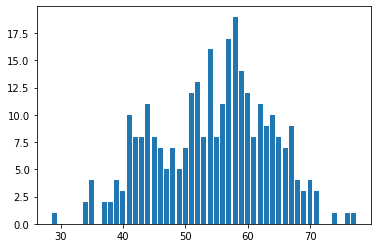

In [ ]:
a = df[col_name].value_counts().sort_index()
plt.bar(a.index, a.values)
plt.show()

# 1. Przygotowanie danych

In [ ]:
df['output'] = df['output'].replace([1,2,3,4], [1,1,1,1])

1.1 Sprawdzenie brakujących wartości

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

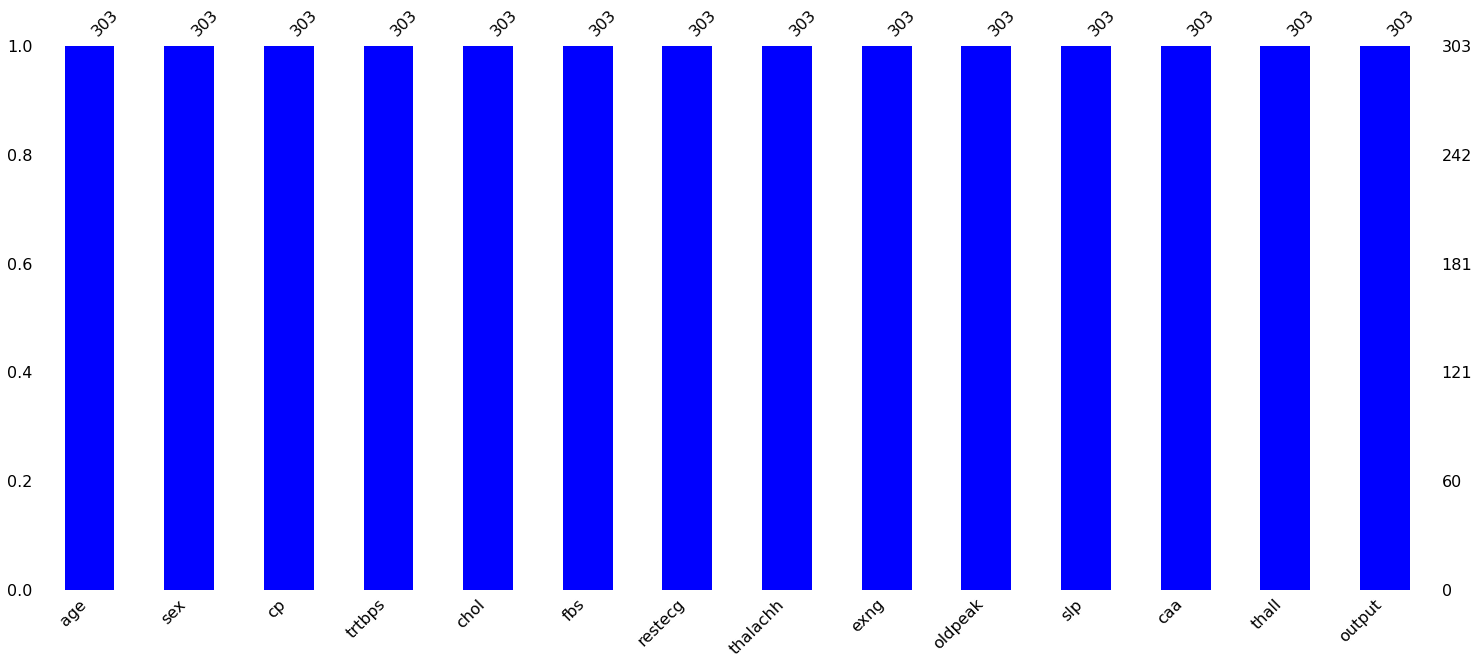

In [ ]:
import missingno

missingno.bar(df, color='b')
plt.show()

In [ ]:
tmp_df = pd.DataFrame(columns=csv_labels)

for i in csv_labels:
    tmp_df = pd.concat([tmp_df, df.loc[df[i].isin(['?'])]])    
    
tmp_df.sort_index()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


# 1.2 Poradzenie sobie z brakującymi wartościami

Wybranie danych do zamiany dla thall (Choroba krwi zwana talasemią, niedokrwistość tarczowatokrwinkowa) </br> </br> 
3 = normalna </br> 
6 = uleczona choroba </br> 
7 = odwracalna choroba </br> </br> 
oraz zmiana numeracji na 0-2

In [ ]:
print(df['thall'].describe())
df['thall'].value_counts()

count     303
unique      4
top       3.0
freq      166
Name: thall, dtype: object


3.0    166
7.0    117
6.0     18
?        2
Name: thall, dtype: int64

In [ ]:
df['thall'] = df['thall'].replace(['?'],df['thall'].mode())

In [ ]:
print(df['thall'].describe())
df['thall'].value_counts()

count     303
unique      3
top       3.0
freq      168
Name: thall, dtype: object


3.0    168
7.0    117
6.0     18
Name: thall, dtype: int64

Wybieranie danych do zamiany dla caa (liczba głównych naczyń zabarwionych w wyniku flouroskopii) </br>
0 - 3

In [ ]:
print(df['caa'].describe())
df['caa'].value_counts()

count     303
unique      5
top       0.0
freq      176
Name: caa, dtype: object


0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: caa, dtype: int64

In [ ]:
df['caa'] = df['caa'].replace(['?'],df['caa'].mode())

In [ ]:
print(df['caa'].describe())
df['caa'].value_counts()

count     303
unique      4
top       0.0
freq      180
Name: caa, dtype: object


0.0    180
1.0     65
2.0     38
3.0     20
Name: caa, dtype: int64

1.3 Sprawdzenie wartości unikalnych

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
print("Ile elementów: ", df['cp'].value_counts().sum())
print("Ile różnych wartości: ", df['cp'].value_counts().count())
df['cp'].value_counts()

Ile elementów:  303
Ile różnych wartości:  4


4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64

In [ ]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index=df.columns, columns=["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,50
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


<b> Analiza </b>
- zmienne z małą liczbą unikalnych wartości będą zmiennymi kategorycznymi, a zmienne z większą liczbą będą numeryczne
- zmienne numeryczne: "age", "trtbps", "chol", "thalach" and "oldpeak"
- zmienne kategoryczne: "sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"

1.4 Separowanie zmiennych (numeryczne i kategoryczne)

In [ ]:
numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", 
                 "thall", "output"]

In [ ]:
df[numeric_var].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [ ]:
df[categoric_var].describe()

,sex,cp,fbs,restecg,exng,slp,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.679868,3.158416,0.148515,0.990099,0.326733,1.600660,0.458746
std,0.467299,0.960126,0.356198,0.994971,0.469794,0.616226,0.499120
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,1.000000,4.000000,0.000000,2.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,1.000000,2.000000,1.000000,3.000000,1.000000


In [ ]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", 
                     "Cholesterol", "Maximum Heart Rate Achieved", 
                     "ST Depression"]
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalachh', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


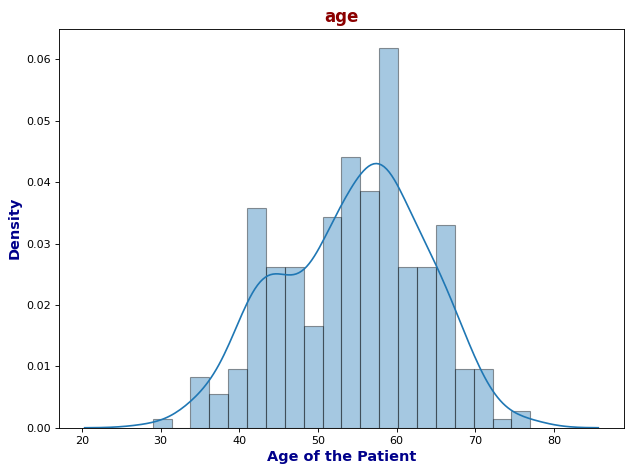

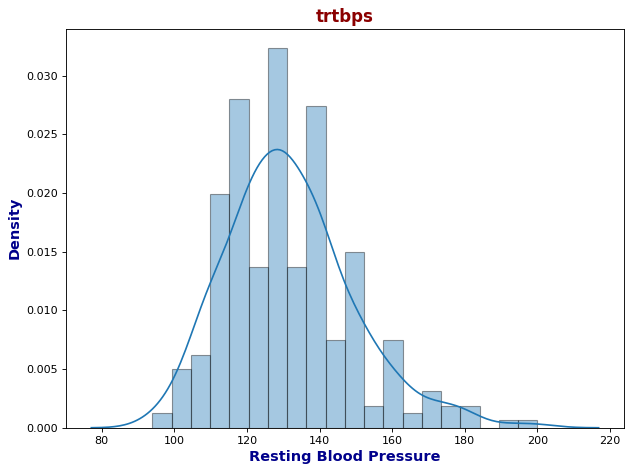

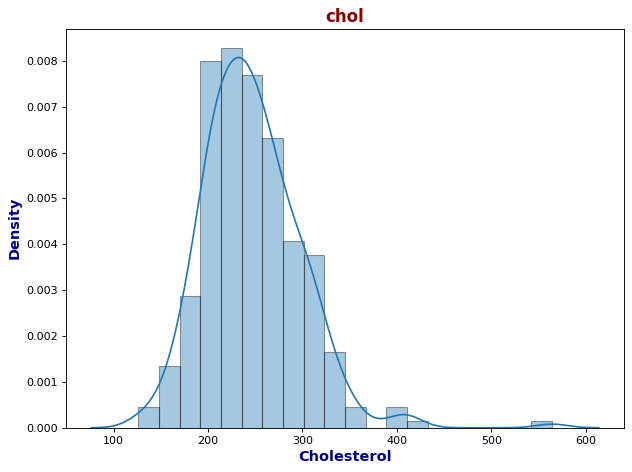

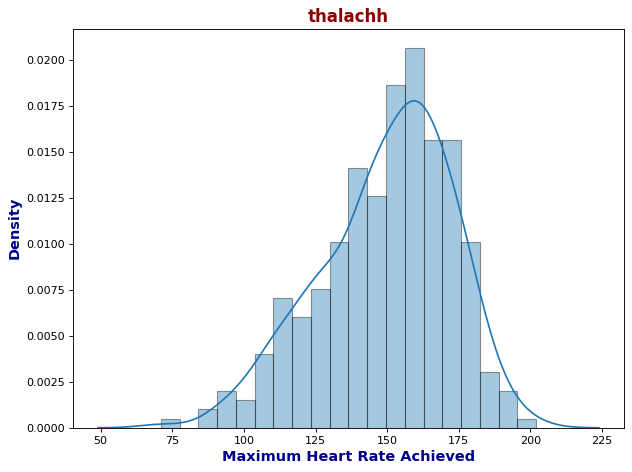

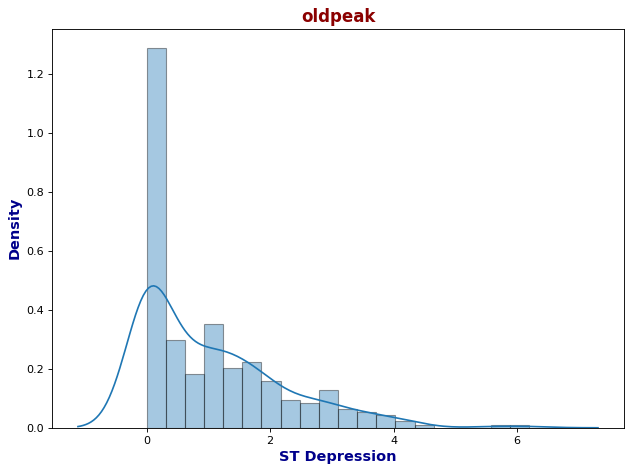

In [ ]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

# Wiek (age)
- Zdecydowana większość pacjentów ma od 50 do 60
- Na wykresie zmniejsza się liczba pacjentów w wieku od 47 do 50 lat
- Wygląda na to, że nie ma wartości odstających
# Ciśnienie krwi podczas odpoczynku (trtbps)
- Spoczynkowe ciśnienie krwi większości pacjentów wynosi na ogół od 110 do 140.
- Wartości po 180 można uznać za wartości odstające.
- Istnieje duża liczba pacjentów między wartościami 115-120, 125-130 i 155-160.
# Cholesterol (chol)
- Wartość cholesterolu u większości pacjentów wynosi od 200 do 280.
- Wartości po 380 można uznać za wartości odstające.
# Maksymalne tętno (thalachh)
- Maksymalne tętno osiągane u większości pacjentów wynosi od 145 do 170.
- W szczególności wartości przed 80 można uznać za wartości odstające
# Obniżenie odcinka ST wywołanego treningiem w porównaniu z odpoczynkiem (oldpeak)
- Wartości zdecydowanej większości pacjentów wahają się od 0 do 2.
- Szczególnie wartości powyżej 4 można uznać za wartości odstające.

# Wartości kategoryczne

In [ ]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", 
                       "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", 
                       "Number of Major Vessels", "Thal", "Target"]
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('restecg', 'Resting Electrocardiographic Results'),
 ('exng', 'Exercise Induced Angina'),
 ('slp', 'The Slope of ST Segment'),
 ('caa', 'Number of Major Vessels'),
 ('thall', 'Thal'),
 ('output', 'Target')]

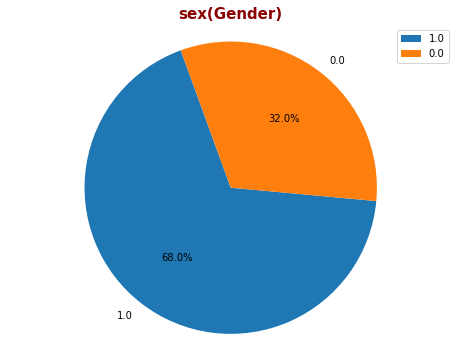

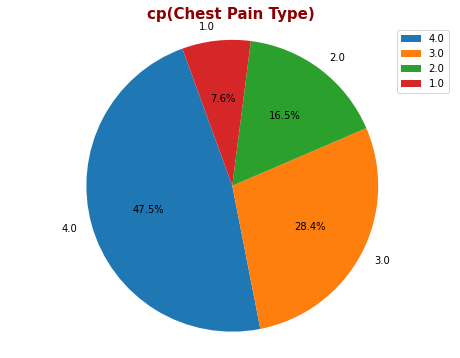

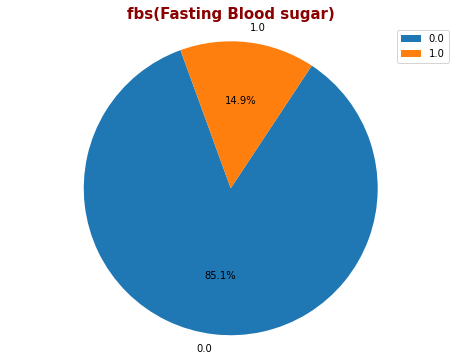

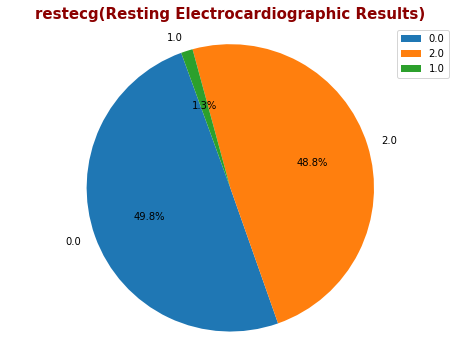

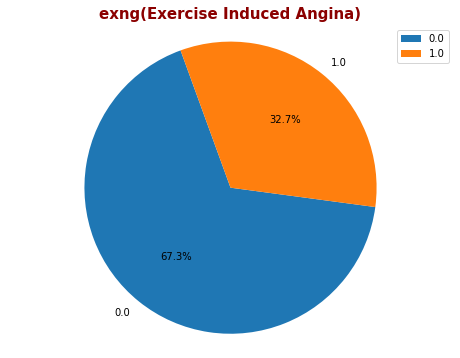

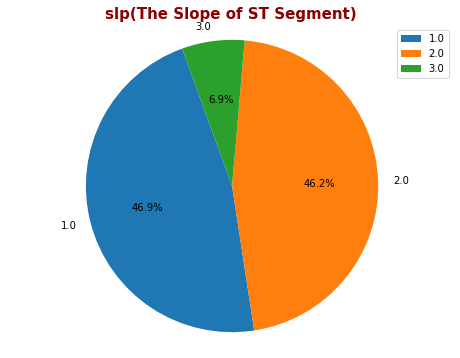

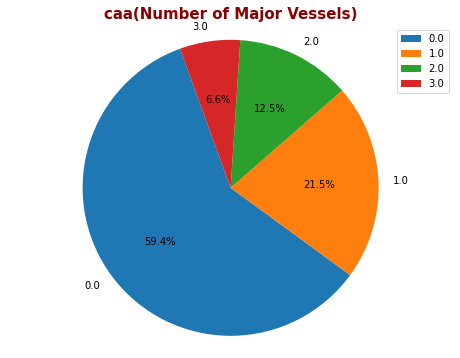

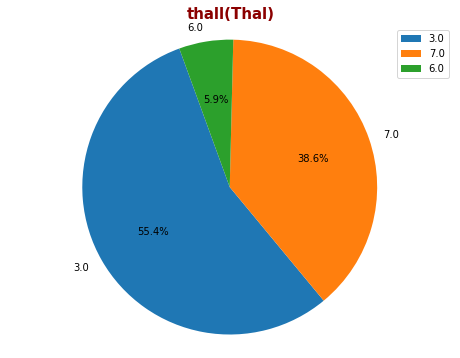

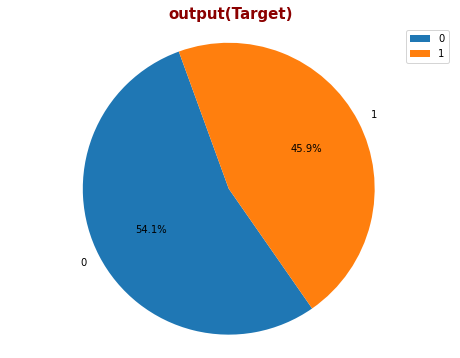

In [ ]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

In [ ]:
numeric_var = numeric_var[:5]
numeric_var.append("output")
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

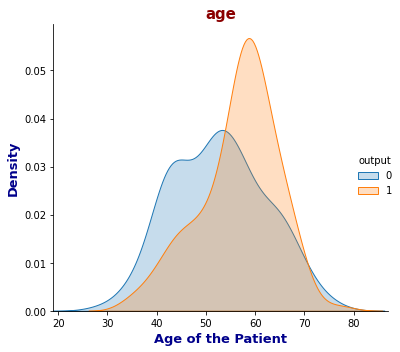

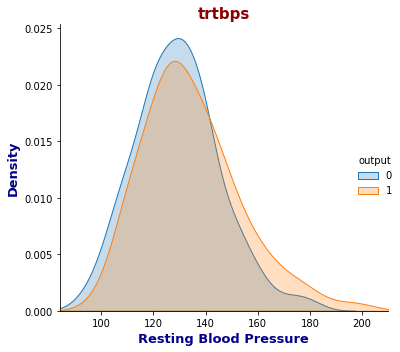

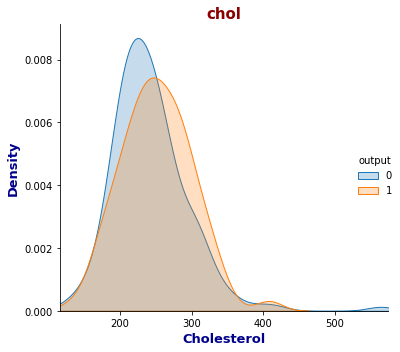

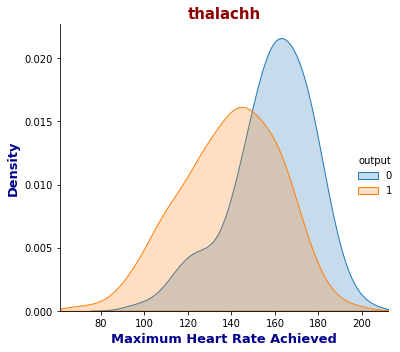

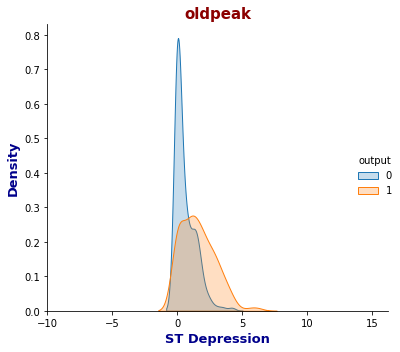

In [ ]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var], hue = "output", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [ ]:
categoric_var

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

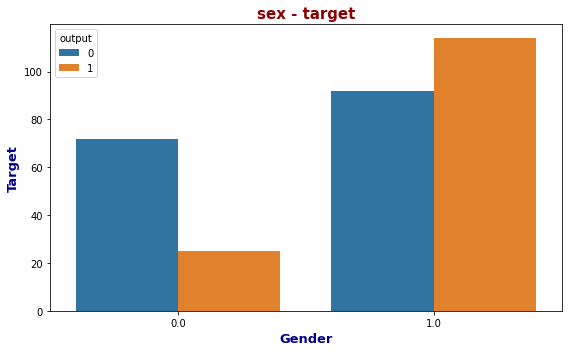

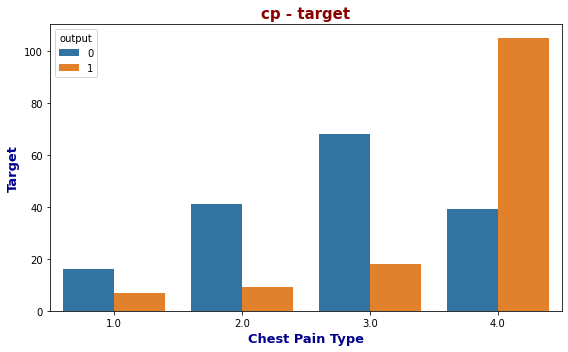

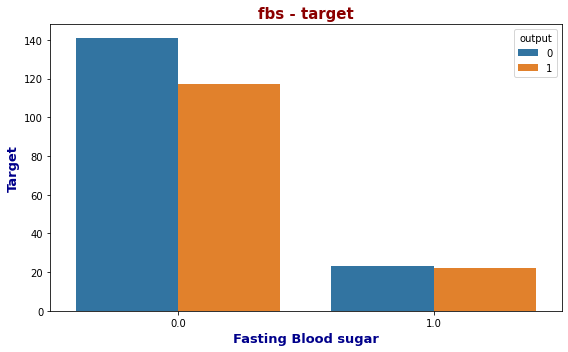

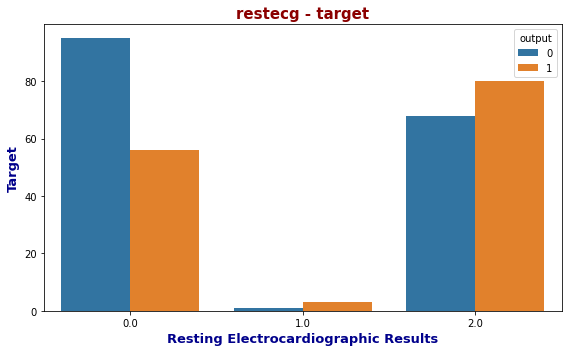

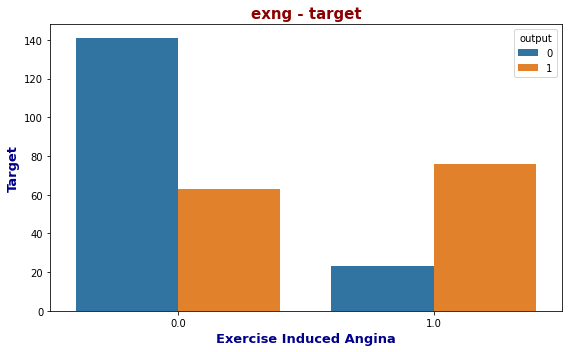

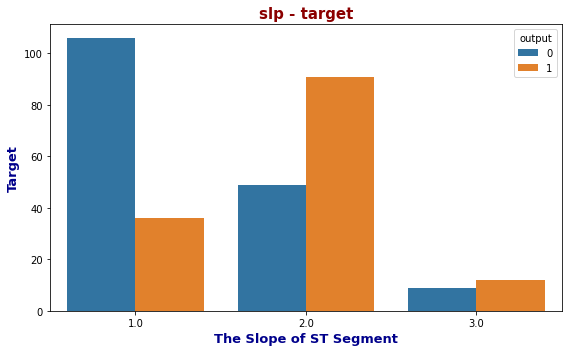

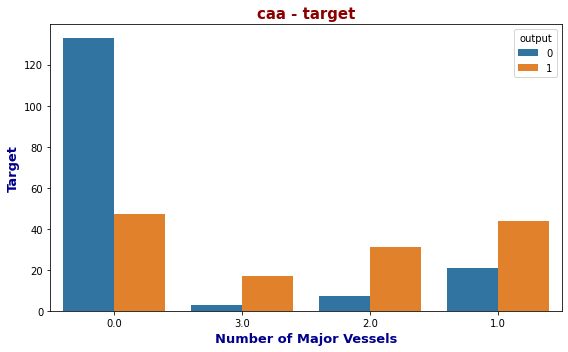

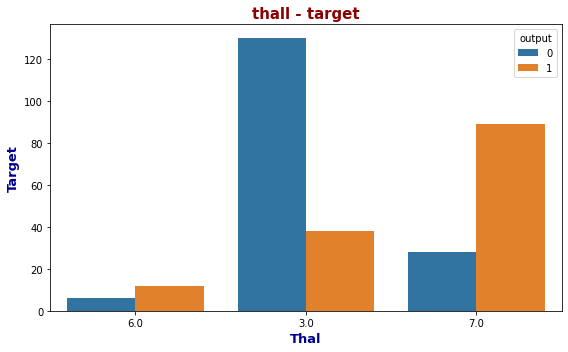

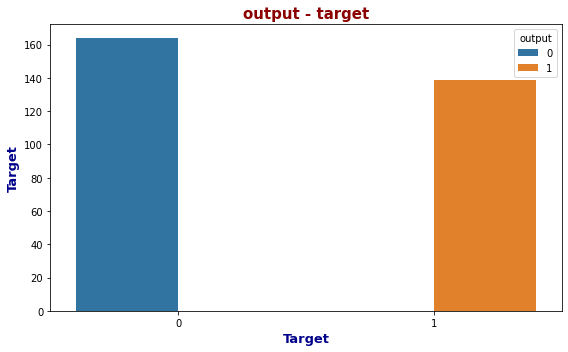

In [ ]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize = (8, 5))
    sns.countplot(i, data = df[categoric_var], hue = "output")
    
    plt.title(i + " - target", fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Target", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

Korelacja między diagnozą, a atrybutami kategorycznymi:

In [ ]:
corr_categoric = df[categoric_var].corr()
#for category in range(len(corr_categoric.index)-1):
 # print(f"'{categoric_var[category]}' -> {round(corr_categoric.iat[8,category], 3)}")

Korelacja między diagnozą, a atrybutami numerycznymi:

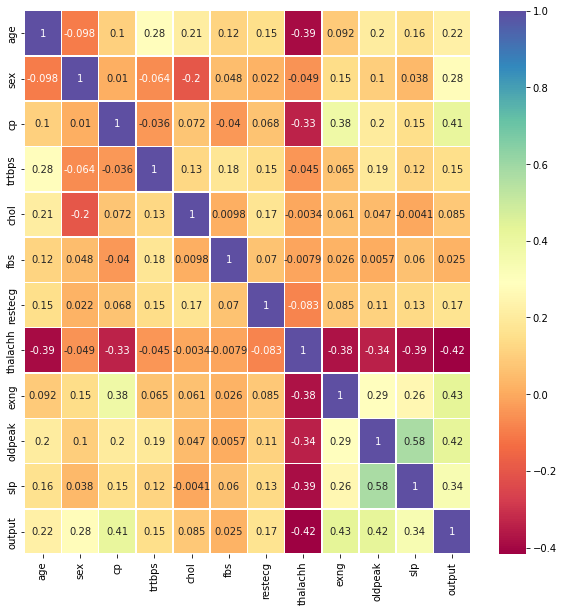

In [ ]:
corr_numeric = df[numeric_var].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data = df.corr(), cmap = "Spectral", annot = True, linewidths = 0.5, ax=ax)

Przykładowe podejście normalizacyjne:

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn import metrics


# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]



# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

X_normalized = X.copy()
X_standarized = X.copy()

# instantiating the scaler
scaler = RobustScaler()
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()


# scaling the continuous featuree
X_normalized[con_cols] = min_max_scaler.fit_transform(X[con_cols])
X_standarized[con_cols] = standard_scaler.fit_transform(X[con_cols])
X[con_cols] = scaler.fit_transform(X[con_cols])

Przykładowy podział zbioru danych:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 42)

**Klasyfikacja**

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.85      0.92      0.88        25

    accuracy                           0.87        46
   macro avg       0.87      0.86      0.87        46
weighted avg       0.87      0.87      0.87        46



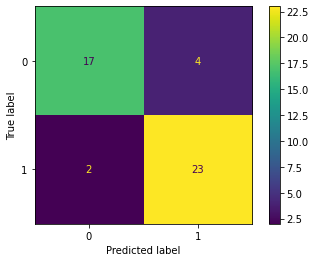

Cross-Validation Accuracy Scores 0.9199999999999999


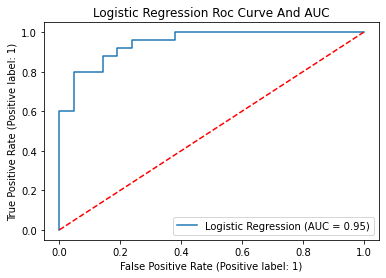

0.8518518518518519
0.92


In [ ]:
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)


print(metrics.classification_report(y_test, y_pred))


plot_confusion_matrix(logreg, X_test, y_test)
plt.show()


scores = cross_val_score(logreg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

plot_roc_curve(logreg, X_test, y_test, name = "Logistic Regression")
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

### 1 - logreg, 2 - random forest, 3 - knn


r_accuracy = []
cross_r_accuracy = []
r_accuracy.append(metrics.accuracy_score(y_test, y_pred))
cross_r_accuracy.append(scores.mean())

z = metrics.accuracy_score(y_test, y_pred)
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.91      0.84      0.87        25

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



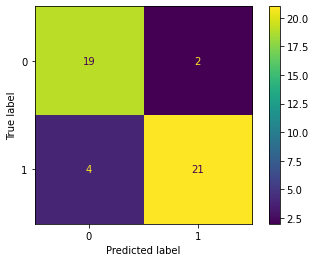

Cross-Validation Accuracy Scores 0.82


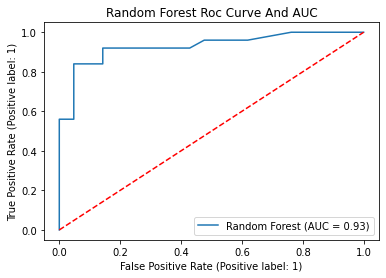

In [ ]:
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

plot_confusion_matrix(rf, X_test, y_test)
plt.show()

scores = cross_val_score(rf, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

plot_roc_curve(rf, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

r_accuracy.append(metrics.accuracy_score(y_test, y_pred))
cross_r_accuracy.append(scores.mean())

Accuracy: 0.8913043478260869


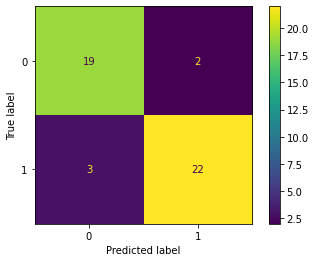

0.825
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.92      0.88      0.90        25

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46



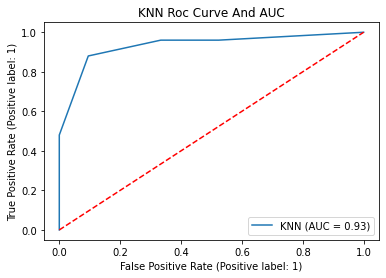

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plot_confusion_matrix(knn, X_test, y_test)
plt.show()

scores = cross_val_score(knn, X_test, y_test, cv = 10)
print(scores.mean())
print(metrics.classification_report(y_test, y_pred))

plot_roc_curve(knn, X_test, y_test, name = "KNN")
plt.title("KNN Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

r_accuracy.append(metrics.accuracy_score(y_test, y_pred))
cross_r_accuracy.append(scores.mean())

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
###################### DANE ZNORMALIZOWANE ##################
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y, test_size = 0.15, random_state = 42)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.88      0.92      0.90        25

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46



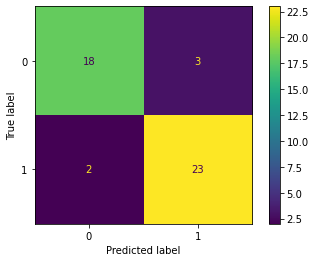

Cross-Validation Accuracy Scores 0.9099999999999999


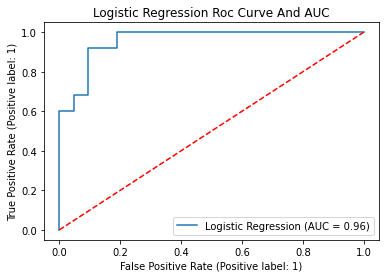

In [ ]:
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)


print(metrics.classification_report(y_test, y_pred))


plot_confusion_matrix(logreg, X_test, y_test)
plt.show()


scores = cross_val_score(logreg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

plot_roc_curve(logreg, X_test, y_test, name = "Logistic Regression")
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

n_accuracy = []
cross_n_accuracy = []
n_accuracy.append(metrics.accuracy_score(y_test, y_pred))
cross_n_accuracy.append(scores.mean())

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.88      0.88      0.88        25

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



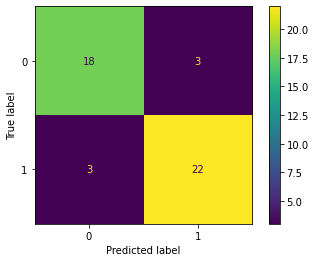

Cross-Validation Accuracy Scores 0.82


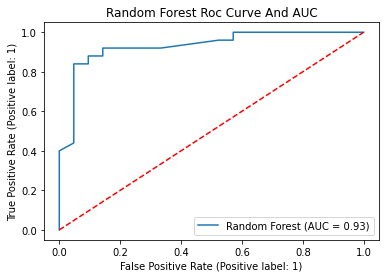

In [ ]:
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

plot_confusion_matrix(rf, X_test, y_test)
plt.show()

scores = cross_val_score(rf, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

plot_roc_curve(rf, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

n_accuracy.append(metrics.accuracy_score(y_test, y_pred))
cross_n_accuracy.append(scores.mean())

Accuracy: 0.8913043478260869


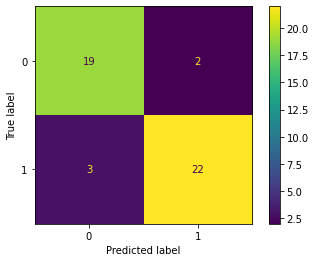

0.825
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.92      0.88      0.90        25

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46



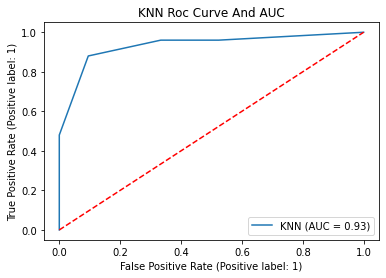

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plot_confusion_matrix(knn, X_test, y_test)
plt.show()

scores = cross_val_score(knn, X_test, y_test, cv = 10)
print(scores.mean())
print(metrics.classification_report(y_test, y_pred))

plot_roc_curve(knn, X_test, y_test, name = "KNN")
plt.title("KNN Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

n_accuracy.append(metrics.accuracy_score(y_test, y_pred))
cross_n_accuracy.append(scores.mean())

In [ ]:
###################### KONIEC TESTU Z NORMALIZACJA ##################

In [ ]:
###################### DANE USTANDARYZOWANE ##################
X_train, X_test, y_train, y_test = train_test_split(X_standarized,y, test_size = 0.15, random_state = 42)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.85      0.92      0.88        25

    accuracy                           0.87        46
   macro avg       0.87      0.86      0.87        46
weighted avg       0.87      0.87      0.87        46



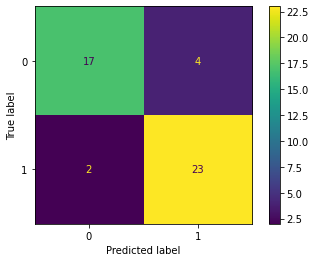

Cross-Validation Accuracy Scores 0.9199999999999999


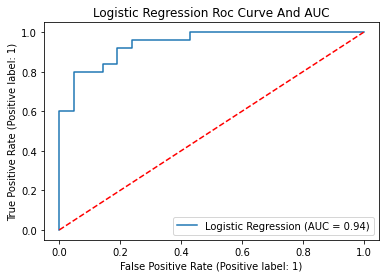

In [ ]:
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)


print(metrics.classification_report(y_test, y_pred))


plot_confusion_matrix(logreg, X_test, y_test)
plt.show()


scores = cross_val_score(logreg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

plot_roc_curve(logreg, X_test, y_test, name = "Logistic Regression")
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

s_accuracy = []
cross_s_accuracy = []
s_accuracy.append(metrics.accuracy_score(y_test, y_pred))
cross_s_accuracy.append(scores.mean())

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.88      0.84      0.86        25

    accuracy                           0.85        46
   macro avg       0.85      0.85      0.85        46
weighted avg       0.85      0.85      0.85        46



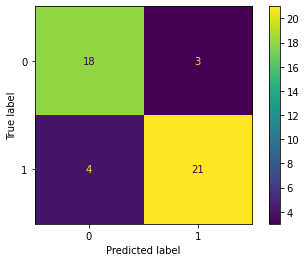

Cross-Validation Accuracy Scores 0.8


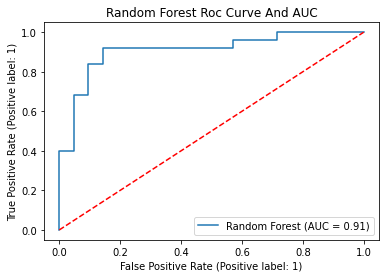

In [ ]:
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

plot_confusion_matrix(rf, X_test, y_test)
plt.show()

scores = cross_val_score(rf, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

plot_roc_curve(rf, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

s_accuracy.append(metrics.accuracy_score(y_test, y_pred))
cross_s_accuracy.append(scores.mean())

Accuracy: 0.8913043478260869


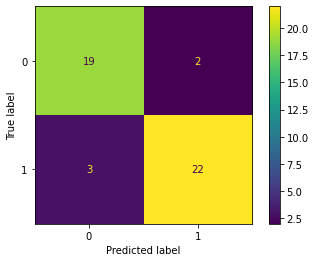

0.825
Cross-Validation Accuracy Scores 0.825
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.92      0.88      0.90        25

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46



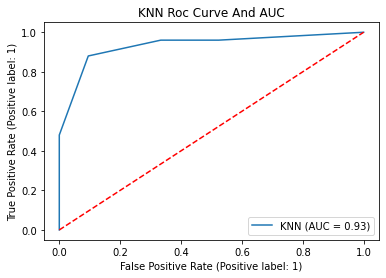

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plot_confusion_matrix(knn, X_test, y_test)
plt.show()

scores = cross_val_score(knn, X_test, y_test, cv = 10)
print(scores.mean())
print("Cross-Validation Accuracy Scores", scores.mean())

print(metrics.classification_report(y_test, y_pred))

plot_roc_curve(knn, X_test, y_test, name = "KNN")
plt.title("KNN Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

s_accuracy.append(metrics.accuracy_score(y_test, y_pred))
cross_s_accuracy.append(scores.mean())

In [ ]:
###################### KONIEC TESTU ZE STANDARYZACJA ##################

In [ ]:
print(n_accuracy[0])

In [ ]:
### wykres ###
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib


labels = ['Standardised', 'Normalised', 'Robust']

logs = [s_accuracy[0], n_accuracy[0], r_accuracy[0]]
forest = [s_accuracy[1], n_accuracy[1], r_accuracy[1]]
knn = [s_accuracy[2], n_accuracy[2], r_accuracy[2]]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - 0.105, logs, width, label='LogReg')
rects2 = ax.bar(x, forest, width, label='RandomForest')
rects3 = ax.bar(x + width/2 +0.105, knn, width, label='KNN')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by data handling and classifier')
ax.set_xticks(x, labels)
ax.legend()

ax.set_xticks(x)
ax.set_xticklabels(labels)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
plt.show()




In [ ]:
labels = ['Standardised', 'Normalised', 'Robust']

logs = [cross_s_accuracy[0], cross_n_accuracy[0], cross_r_accuracy[0]]
forest = [cross_s_accuracy[1], cross_n_accuracy[1], cross_r_accuracy[1]]
knn = [cross_s_accuracy[2], cross_n_accuracy[2], cross_r_accuracy[2]]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - 0.105, logs, width, label='LogReg')
rects2 = ax.bar(x, forest, width, label='RandomForest')
rects3 = ax.bar(x + width/2 +0.105, knn, width, label='KNN')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cross-validation accuracy')
ax.set_title('Cross-validation accuracy by data handling and classifier')
ax.set_xticks(x, labels)
ax.legend()

ax.set_xticks(x)
ax.set_xticklabels(labels)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [ ]:
print(s_accuracy)
print(n_accuracy)
print(r_accuracy)
print(cross_s_accuracy)
print(cross_n_accuracy)
print(cross_r_accuracy)

In [ ]:
article_df = df[['age', 'cp', 'trtbps', 'fbs', 'restecg', 'thalachh', 'exng', 'output']]

article_df

In [ ]:
X_article = article_df.drop(["output"], axis = 1).to_numpy()
y_article = article_df[["output"]].to_numpy().reshape(article_df[["output"]].shape[0])
min_max_scaler = preprocessing.MinMaxScaler()
X_art_scaled = min_max_scaler.fit_transform(X_article)

In [ ]:
X_art_train, X_art_test, y_art_train, y_art_test = train_test_split(X_art_scaled, y_article, test_size = 0.1, random_state = 3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_art = LogisticRegression()
log_reg_art.fit(X_art_train, y_art_train)

y_art_pred = log_reg_art.predict(X_art_test)
accuracy_art = accuracy_score(y_art_test, y_art_pred)
print("Test Accuracy: {}".format(accuracy_art))

# Bibliografia
1. Heart Disease Prediction using Exploratory Data Analysis
R. Indrakumaria, T. Poongodib, Soumya Ranjan Jena.
2. Remco R. Bouckaert and Eibe Frank. Evaluating the Replicability of Significance Tests for Comparing Learning Algorithms.
3. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology.
4. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
5. Yoav Freund and Lorne Mason. The Alternating Decision Tree Learning Algorithm.
6. https://archive.ics.uci.edu/ml/datasets/Heart+Disease?fbclid=IwAR2JMrbGy6oMNuDuV3LQLG517EWlLiy_WfDlXhMyXMabS19qRhRRs9_b8XQ